## Q1. Explain the difference between simple linear regression and multiple linear regression. Provide an example of each.

##

Simple Linear Regression:

Simple linear regression is a statistical method used to model the relationship between a dependent variable (usually denoted as 'Y') and a single independent variable (usually denoted as 'X'). It assumes that the relationship between the two variables can be approximated by a straight line. The goal of simple linear regression is to find the best-fitting line that minimizes the sum of squared differences between the observed values and the predicted values.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data for simple linear regression
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
exam_scores = np.array([50, 60, 70, 75, 80, 85, 90, 95, 100, 105])

# Create a Linear Regression model
simple_linear_model = LinearRegression()

# Fit the model on the data
simple_linear_model.fit(hours_studied, exam_scores)

# Predict exam scores for new data points (e.g., 11 hours studied)
new_hours_studied = np.array([11]).reshape(-1, 1)
predicted_scores = simple_linear_model.predict(new_hours_studied)

print("Simple Linear Regression Model:")
print("Intercept (β0):", simple_linear_model.intercept_)
print("Coefficient (β1):", simple_linear_model.coef_[0])
print("Predicted score for 11 hours studied:", predicted_scores[0])

Simple Linear Regression Model:
Intercept (β0): 49.33333333333333
Coefficient (β1): 5.757575757575759
Predicted score for 11 hours studied: 112.66666666666667


##
Multiple Linear Regression:

Multiple linear regression is an extension of simple linear regression that allows for modeling the relationship between a dependent variable (Y) and multiple independent variables (X1, X2, ..., Xn). It assumes that the relationship between the dependent variable and the independent variables can be approximated by a linear combination of those variables. The goal of multiple linear regression is to find the best-fitting hyperplane in a multi-dimensional space that minimizes the sum of squared differences between the observed values and the predicted values.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data for multiple linear regression
# House features: number of bedrooms, square footage, and distance from city center
X = np.array([[3, 1500, 5], [4, 2000, 10], [2, 1200, 3], [5, 2500, 15], [4, 1800, 8]])
# House prices
y = np.array([350000, 500000, 280000, 550000, 450000])

# Create a Linear Regression model
multiple_linear_model = LinearRegression()

# Fit the model on the data
multiple_linear_model.fit(X, y)

# Predict house price for new data points
new_house_features = np.array([[4, 2200, 12], [3, 1800, 6]])
predicted_prices = multiple_linear_model.predict(new_house_features)

print("Multiple Linear Regression Model:")
print("Intercept (β0):", multiple_linear_model.intercept_)
print("Coefficients (β1, β2, β3):", multiple_linear_model.coef_)
print("Predicted prices for new houses:", predicted_prices)

Multiple Linear Regression Model:
Intercept (β0): 33333.33333333605
Coefficients (β1, β2, β3): [58333.33333333   116.66666667 -3333.33333333]
Predicted prices for new houses: [483333.33333333 398333.33333333]


## Q2. Discuss the assumptions of linear regression. How can you check whether these assumptions hold in a given dataset?

##
Linear regression makes several assumptions about the data to provide valid and reliable results. These assumptions are important for the accuracy and interpretability of the regression model. Here are the key assumptions of linear regression:

Linearity: The relationship between the dependent variable (Y) and the independent variables (X) is assumed to be linear. This means the change in Y is proportional to the change in X.

Independence: The observations are assumed to be independent of each other. There should be no systematic patterns or dependencies among the residuals (errors).

Homoscedasticity: The variance of the residuals is constant across all values of the independent variables. In other words, the spread of the residuals should remain consistent across the range of X values.

Normality: The residuals are assumed to be normally distributed. This means that the errors follow a normal distribution with a mean of zero.

No Multicollinearity: There should be no perfect multicollinearity among the independent variables. This means that the independent variables should not be highly correlated with each other.

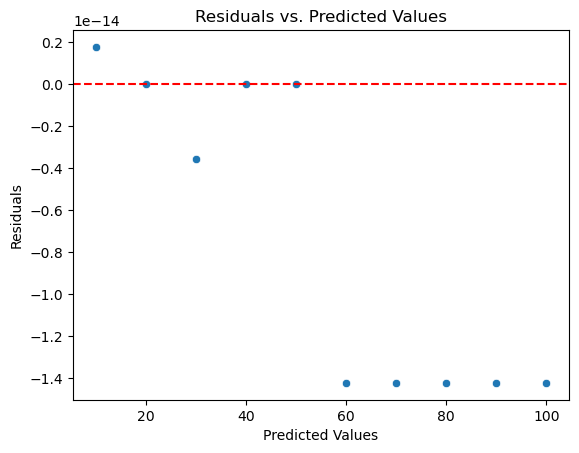

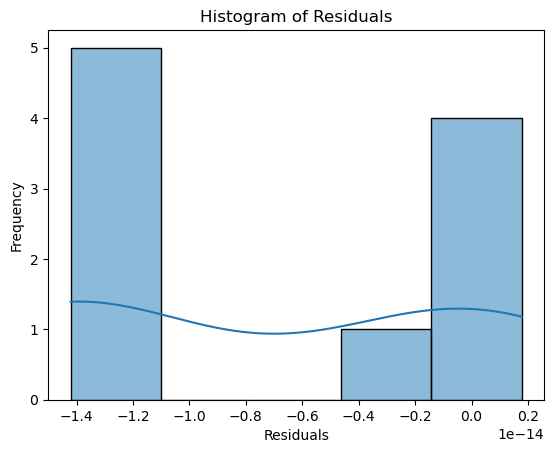

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Sample data for linear regression
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Add constant term to the independent variable matrix
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(Y, X).fit()

# Residuals (errors)
residuals = model.resid

# Plot the residuals against the predicted values (to check linearity and homoscedasticity)
sns.scatterplot(x=model.predict(), y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Plot the histogram of residuals (to check normality)
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Calculate the Variance Inflation Factor (VIF) to check for multicollinearity
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [sm.OLS(X[:, i], X[:, :i]).fit().rsquared for i in range(1, X.shape[1])]
print(vif)

## Q3. How do you interpret the slope and intercept in a linear regression model? Provide an example using a real-world scenario.

##
In a linear regression model, the slope and intercept have specific interpretations:

Intercept (β0): The intercept (β0) represents the predicted value of the dependent variable (Y) when all the independent variables (X) are equal to zero. In other words, it is the value of Y when there is no influence from the independent variables.

Slope (β1, β2, ...): The slope coefficients (β1, β2, ...) represent the change in the dependent variable (Y) for a one-unit change in the corresponding independent variable (X1, X2, ...). The slope indicates the direction and magnitude of the relationship between the dependent and independent variables.

Let's illustrate this with a real-world scenario using Python code:

Example: Predicting House Prices

Suppose you are a real estate agent, and you want to predict house prices based on the square footage of houses. You have collected data on the square footage (in square feet) of several houses and their corresponding prices (in thousands of dollars). Let's perform a simple linear regression to predict house prices based on square footage.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Sample data for house prices and square footage
square_footage = np.array([1000, 1500, 2000, 2500, 3000, 3500, 4000])
house_prices = np.array([200, 300, 400, 450, 500, 550, 600])

# Add constant term to the independent variable matrix
X = sm.add_constant(square_footage)

# Create the linear regression model
model = sm.OLS(house_prices, X).fit()

# Get the intercept and slope
intercept = model.params[0]
slope = model.params[1]

# Print the results
print("Intercept (β0):", intercept)
print("Slope (β1):", slope)

# Predict house prices for new square footage (e.g., 2500 square feet)
new_square_footage = np.array([2500])
predicted_price = intercept + slope * new_square_footage
print("Predicted price for 2500 square feet:", predicted_price[0])

Intercept (β0): 107.14285714285717
Slope (β1): 0.1285714285714286
Predicted price for 2500 square feet: 428.5714285714286


## Q4. Explain the concept of gradient descent. How is it used in machine learning?

##
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning models. It is a first-order optimization algorithm that iteratively adjusts the parameters of a model in the direction of the steepest descent (negative gradient) of the cost function. By following this path, the algorithm aims to find the optimal set of parameters that minimize the cost function and, consequently, improve the performance of the machine learning model.

In simpler terms, gradient descent is like walking down a hill. The goal is to reach the bottom (minimum) by taking small steps in the direction where the slope is steepest.

Here's a step-by-step explanation of how gradient descent works:

Initialize Parameters: Start with initial values for the model's parameters (weights and biases).

Compute the Gradient: Calculate the gradient of the cost function with respect to each parameter. The gradient tells us the direction and magnitude of the steepest ascent. In a minimization problem, we take the negative of the gradient.

Update Parameters: Update the parameters in the opposite direction of the gradient to move towards the minimum. The size of the update is determined by the learning rate, which controls the step size.

Iterate: Repeat steps 2 and 3 until the cost function converges to a minimum or a predefined number of iterations is reached.

Gradient descent is widely used in training machine learning models, such as linear regression, logistic regression, neural networks, and more. It is the backbone of most optimization algorithms used in deep learning.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for simple linear regression
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])

# Initialize model parameters (slope and intercept)
slope = 0
intercept = 0

# Set learning rate and number of iterations
learning_rate = 0.01
num_iterations = 100

# Gradient Descent Algorithm
for _ in range(num_iterations):
    # Calculate predictions (Y_hat) using current parameters
    Y_hat = slope * X + intercept
    
    # Calculate the gradients of the cost function with respect to slope and intercept
    gradient_slope = -(2/len(X)) * np.sum(X * (Y - Y_hat))
    gradient_intercept = -(2/len(X)) * np.sum(Y - Y_hat)
    
    # Update parameters using the gradients and learning rate
    slope -= learning_rate * gradient_slope
    intercept -= learning_rate * gradient_intercept

# Print the final values of slope and intercept
print("Final Slope:", slope)
print("Final Intercept:", intercept)

Final Slope: 0.9728893670773188
Final Intercept: 0.8537510676872087


## Q5. Describe the multiple linear regression model. How does it differ from simple linear regression?

## 
Multiple Linear Regression Model:

Multiple linear regression is an extension of simple linear regression that allows us to model the relationship between a dependent variable (Y) and multiple independent variables (X1, X2, ..., Xn). Instead of a straight line, the multiple linear regression model fits a hyperplane in a multi-dimensional space to approximate the relationship between the dependent and independent variables. The model is represented as:

Y = β0 + β1 * X1 + β2 * X2 + ... + βn * Xn + ε

Where:

Y is the dependent variable (the variable we want to predict).

X1, X2, ..., Xn are the independent variables (predictor variables).

β0, β1, β2, ..., βn are the regression coefficients (intercept and slopes for each independent variable).
ε represents the error term or residual (the difference between the predicted and observed values).
The goal of multiple linear regression is to find the best-fitting hyperplane that minimizes the sum of squared differences between the observed values and the predicted values.

Difference between Simple Linear Regression and Multiple Linear Regression:

Number of Independent Variables: The primary difference is in the number of independent variables used. Simple linear regression uses only one independent variable, while multiple linear regression uses two or more independent variables.

Model Complexity: Multiple linear regression is more complex than simple linear regression since it involves multiple predictors and allows for a higher-dimensional relationship between the dependent and independent variables.

Model Interpretation: In simple linear regression, the relationship is represented by a straight line, making it easier to interpret the effect of the independent variable on the dependent variable. In multiple linear regression, the relationship is represented by a hyperplane, making it more challenging to visualize and interpret.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data for multiple linear regression
X1 = np.array([1, 2, 3, 4, 5])
X2 = np.array([2, 4, 5, 3, 6])
Y = np.array([10, 20, 30, 25, 40])

# Create a DataFrame with the independent variables
data = pd.DataFrame({'X1': X1, 'X2': X2})

# Create the linear regression model
multiple_linear_model = LinearRegression()

# Fit the model on the data
multiple_linear_model.fit(data, Y)

# Get the intercept and coefficients (slopes)
intercept = multiple_linear_model.intercept_
coefficients = multiple_linear_model.coef_

print("Intercept (β0):", intercept)
print("Coefficients (β1, β2):", coefficients)

Intercept (β0): -1.7647058823529385
Coefficients (β1, β2): [3.82352941 3.82352941]


## Q6. Explain the concept of multicollinearity in multiple linear regression. How can you detect and address this issue?

##
Multicollinearity is a phenomenon that occurs in multiple linear regression when two or more independent variables are highly correlated with each other. In other words, it exists when there is a strong linear relationship between two or more independent variables. Multicollinearity can cause several issues in the multiple linear regression model:

Unstable Coefficients: Multicollinearity makes the estimated regression coefficients sensitive to small changes in the data, leading to instability in the model.

Reduced Interpretability: It becomes difficult to interpret the individual effects of each independent variable on the dependent variable when they are highly correlated.

Inflated Standard Errors: Multicollinearity inflates the standard errors of the regression coefficients, making it harder to determine the statistical significance of the independent variables.

To detect multicollinearity, we can calculate the Variance Inflation Factor (VIF) for each independent variable. The VIF measures how much the variance of an estimated regression coefficient increases when that variable is included in the model compared to when it is not included. A VIF value greater than 5 or 10 indicates the presence of multicollinearity.

To address multicollinearity, we can take several steps:

Feature Selection: Remove one or more of the highly correlated independent variables from the model.

Data Transformation: Use data transformation techniques such as PCA (Principal Component Analysis) to create uncorrelated components.

Combine Variables: If it makes sense in the context of the problem, combine the highly correlated variables into a single composite variable.

In [7]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# Sample data for multiple linear regression with multicollinearity
X1 = np.array([1, 2, 3, 4, 5])
X2 = np.array([2, 4, 5, 3, 6])
Y = np.array([10, 20, 30, 25, 40])

# Create a DataFrame with the independent variables
data = pd.DataFrame({'X1': X1, 'X2': X2})

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = data.columns
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print("Variance Inflation Factors:")
print(vif)

# Create the linear regression model
multiple_linear_model = LinearRegression()

# Fit the model on the data
multiple_linear_model.fit(data, Y)

# Get the intercept and coefficients (slopes)
intercept = multiple_linear_model.intercept_
coefficients = multiple_linear_model.coef_

print("\nIntercept (β0):", intercept)
print("Coefficients (β1, β2):", coefficients)

Variance Inflation Factors:
  Features        VIF
0       X1  10.737527
1       X2  10.737527

Intercept (β0): -1.7647058823529385
Coefficients (β1, β2): [3.82352941 3.82352941]


## Q7. Describe the polynomial regression model. How is it different from linear regression?

## 
Polynomial Regression Model:

Polynomial regression is a form of multiple linear regression, where the relationship between the dependent variable (Y) and the independent variable (X) is modeled as an nth-degree polynomial function. In other words, it allows us to fit a curved line to the data instead of a straight line as in simple and multiple linear regression. The polynomial regression model can capture more complex relationships between variables, making it more flexible and suitable for non-linear patterns in the data.

Difference between Linear Regression and Polynomial Regression:

The primary difference between linear regression and polynomial regression lies in the relationship between the dependent and independent variables:

Linear Regression: In linear regression, the relationship is represented by a straight line (a first-degree polynomial). It is suitable for data that exhibits a linear pattern.

Polynomial Regression: In polynomial regression, the relationship is represented by a curved line (a higher-degree polynomial). It is suitable for data that shows a non-linear pattern.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data for polynomial regression
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 6, 12, 20, 30])

# Reshape X to a 2D array
X = X.reshape(-1, 1)

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create the polynomial regression model
polynomial_model = LinearRegression()

# Fit the model on the polynomial features
polynomial_model.fit(X_poly, Y)

# Get the intercept and coefficients (slopes) for the polynomial model
intercept = polynomial_model.intercept_
coefficients = polynomial_model.coef_

print("Intercept (β0):", intercept)
print("Coefficients (β1, β2):", coefficients)

Intercept (β0): 1.4210854715202004e-14
Coefficients (β1, β2): [0. 1. 1.]


## Q8. What are the advantages and disadvantages of polynomial regression compared to linear regression? In what situations would you prefer to use polynomial regression?

## 
Advantages of Polynomial Regression:

Flexibility: Polynomial regression can model non-linear relationships between variables, making it suitable for data with complex patterns that cannot be captured by linear regression.

Better Fit to Data: When the underlying relationship between variables is non-linear, polynomial regression can provide a better fit to the data compared to linear regression.

Interpolation and Extrapolation: Polynomial regression can be used for interpolation (predicting values within the range of the training data) and extrapolation (predicting values beyond the range of the training data).

Disadvantages of Polynomial Regression:

Overfitting: High-degree polynomial regression can lead to overfitting, where the model performs well on the training data but poorly on unseen data. It is essential to choose an appropriate degree of the polynomial to avoid overfitting.

Increased Complexity: As the degree of the polynomial increases, the model becomes more complex and harder to interpret.

Sensitive to Outliers: Polynomial regression can be sensitive to outliers in the data, causing the model to fit the noise instead of the underlying pattern.

When to Prefer Polynomial Regression:

Polynomial regression is preferred over linear regression in the following situations:

Non-linear Data: When the relationship between the dependent and independent variables is non-linear, polynomial regression provides a better fit to the data.

Higher-Degree Relationships: When the underlying relationship between variables cannot be adequately approximated by a straight line, polynomial regression with a higher degree can capture the curvature of the relationship.

Smooth Curves: Polynomial regression can be useful for fitting smooth curves to data, such as in time series forecasting or engineering applications.

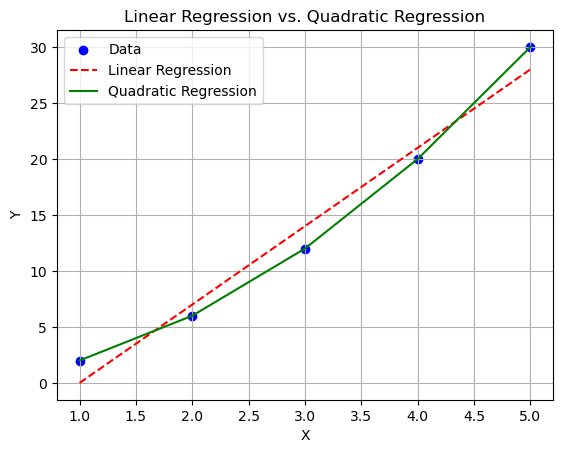

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data for polynomial regression
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 6, 12, 20, 30])

# Reshape X to a 2D array
X = X.reshape(-1, 1)

# Create polynomial features up to degree 1 (linear regression)
poly_linear = PolynomialFeatures(degree=1)
X_poly_linear = poly_linear.fit_transform(X)

# Create polynomial features up to degree 2 (polynomial regression)
poly_quadratic = PolynomialFeatures(degree=2)
X_poly_quadratic = poly_quadratic.fit_transform(X)

# Create the linear regression model for linear features
linear_model = LinearRegression()
linear_model.fit(X_poly_linear, Y)

# Create the polynomial regression model for quadratic features
quadratic_model = LinearRegression()
quadratic_model.fit(X_poly_quadratic, Y)

# Generate predictions for the models
Y_pred_linear = linear_model.predict(X_poly_linear)
Y_pred_quadratic = quadratic_model.predict(X_poly_quadratic)

# Plot the data and regression lines
plt.scatter(X, Y, label='Data', color='blue')
plt.plot(X, Y_pred_linear, label='Linear Regression', color='red', linestyle='--')
plt.plot(X, Y_pred_quadratic, label='Quadratic Regression', color='green', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression vs. Quadratic Regression')
plt.grid(True)
plt.show()